In [1]:
%matplotlib inline
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from retrosheet_controller import RetroSheetDataController
from analyze_batter import AnalyzeBatter

In [2]:
# Data controller
client = RetroSheetDataController()
# 分析用のUtilクラス(引数：RETROSHEETを取り扱う用のUtilクラス)
analyzer = AnalyzeBatter()

In [3]:
# 2004年および2011年の松井秀喜成績データを読み込む
df2004 = client.batter_event_by_hits('Hideki', 'Matsui', 2004)
df2011 = client.batter_event_by_hits('Hideki', 'Matsui', 2011)

In [4]:
# 内野・外野に飛んだ打球をヒットの種類ごとに数え上げ
hit_charts2004 = analyzer.hit_location_data(df2004)
hit_charts2011 = analyzer.hit_location_data(df2011)

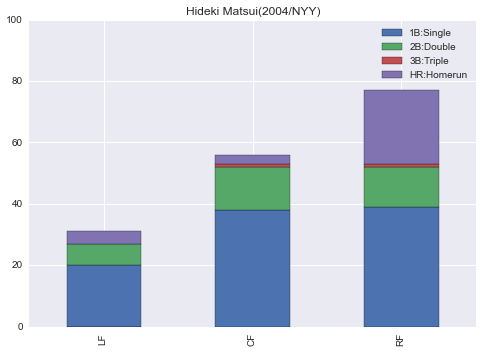

In [5]:
# 棒グラフとして表示(2004年、外野)
dfpos2004 = pd.DataFrame(hit_charts2004.get('of'))
dfpos2004.T.plot(kind='bar', stacked=True, ylim=(0, 100), title='Hideki Matsui(2004/NYY)')

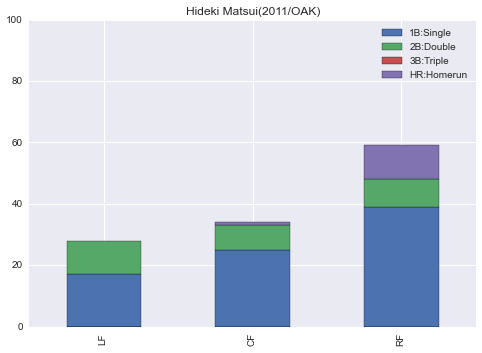

In [6]:
# 棒グラフとして表示(2011年、外野)

dfpos2011 = pd.DataFrame(hit_charts2011.get('of'))
dfpos2011.T.plot(kind='bar', stacked=True, ylim=(0, 100), title='Hideki Matsui(2011/OAK)')

In [8]:
from retrosheet_util import RetroSheetUtil
for i, row in df2004.iterrows():
    atbat = row.to_dict()
    pitch_seq = RetroSheetUtil.get_pitch_sequence(atbat.get('pitch_seq_tx'), atbat.get('event_cd'))
    print(pitch_seq)

{'pitches': 5, 'strike': 1, 'pickoff': 0, 'ball_count': {'strike': 1, 'ball': 3}, 'event': ('DGR', 'D'), 'seq': ['ball', 'ball', 'foul', 'ball', 'ball put into play by batter'], 'ball': 3}
{'pitches': 1, 'strike': 0, 'pickoff': 0, 'ball_count': {'strike': 0, 'ball': 0}, 'event': ('S',), 'seq': ['ball put into play by batter'], 'ball': 0}
{'pitches': 4, 'strike': 1, 'pickoff': 0, 'ball_count': {'strike': 1, 'ball': 2}, 'event': ('HR',), 'seq': ['ball', 'swinging strike', 'ball', 'ball put into play by batter'], 'ball': 2}
{'pitches': 5, 'strike': 1, 'pickoff': 0, 'ball_count': {'strike': 1, 'ball': 3}, 'event': ('S',), 'seq': ['ball', 'ball', 'foul', 'ball', 'ball put into play by batter'], 'ball': 3}
{'pitches': 4, 'strike': 2, 'pickoff': 0, 'ball_count': {'strike': 2, 'ball': 1}, 'event': ('DGR', 'D'), 'seq': ['marker for play not involving the batter', 'marker for play not involving the batter', 'called strike', 'ball', 'called strike', 'ball put into play by batter'], 'ball': 1}
{'p